<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Solutions Session 8 - Kalman Filters<br/> Autumn 2020 <br/> Duration : 4 hours (2 in session + 2 at home)</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Goals" data-toc-modified-id="Learning-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Goals</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Main-Goal" data-toc-modified-id="Main-Goal-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Main Goal</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li><li><span><a href="#Kalman-Filter-Design" data-toc-modified-id="Kalman-Filter-Design-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kalman Filter Design</a></span><ul class="toc-item"><li><span><a href="#Modeling-the-filter-(Theory-Refresher)" data-toc-modified-id="Modeling-the-filter-(Theory-Refresher)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Modeling the filter (Theory Refresher)</a></span></li><li><span><a href="#Understanding-how-the-filter-works" data-toc-modified-id="Understanding-how-the-filter-works-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Understanding how the filter works</a></span></li></ul></li><li><span><a href="#Data-Acquisition" data-toc-modified-id="Data-Acquisition-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Acquisition</a></span><ul class="toc-item"><li><span><a href="#Python-Implementation" data-toc-modified-id="Python-Implementation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Python Implementation</a></span></li><li><span><a href="#ASEBA-implementation" data-toc-modified-id="ASEBA-implementation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ASEBA implementation</a></span></li></ul></li><li><span><a href="#Model-Parameters" data-toc-modified-id="Model-Parameters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Parameters</a></span><ul class="toc-item"><li><span><a href="#Velocity-parameters" data-toc-modified-id="Velocity-parameters-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Velocity parameters</a></span><ul class="toc-item"><li><span><a href="#Thymio's-speed-in-mm/s" data-toc-modified-id="Thymio's-speed-in-mm/s-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Thymio's speed in mm/s</a></span></li><li><span><a href="#Conversion-factor-:-Thymio-speed-->-mm/s" data-toc-modified-id="Conversion-factor-:-Thymio-speed-->-mm/s-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Conversion factor : Thymio speed -&gt; mm/s</a></span></li><li><span><a href="#Speed-variance" data-toc-modified-id="Speed-variance-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Speed variance</a></span></li><li><span><a href="#Variance-of-speed-state-and-measurements" data-toc-modified-id="Variance-of-speed-state-and-measurements-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Variance of speed state and measurements</a></span></li></ul></li><li><span><a href="#Variance-on-position-state-and-measurement" data-toc-modified-id="Variance-on-position-state-and-measurement-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Variance on position state and measurement</a></span></li></ul></li><li><span><a href="#Kalman-Filter-Implementation" data-toc-modified-id="Kalman-Filter-Implementation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Kalman Filter Implementation</a></span><ul class="toc-item"><li><span><a href="#Filter-Implementation" data-toc-modified-id="Filter-Implementation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Filter Implementation</a></span></li><li><span><a href="#Full-filtering-pipeline" data-toc-modified-id="Full-filtering-pipeline-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Full filtering pipeline</a></span><ul class="toc-item"><li><span><a href="#Pipeline-Implementation" data-toc-modified-id="Pipeline-Implementation-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Pipeline Implementation</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Visualisation</a></span><ul class="toc-item"><li><span><a href="#Odometry-vs.-Filtered-Position" data-toc-modified-id="Odometry-vs.-Filtered-Position-7.2.2.1"><span class="toc-item-num">7.2.2.1&nbsp;&nbsp;</span>Odometry vs. Filtered Position</a></span></li><li><span><a href="#Transitions" data-toc-modified-id="Transitions-7.2.2.2"><span class="toc-item-num">7.2.2.2&nbsp;&nbsp;</span>Transitions</a></span></li><li><span><a href="#Velocities" data-toc-modified-id="Velocities-7.2.2.3"><span class="toc-item-num">7.2.2.3&nbsp;&nbsp;</span>Velocities</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Learning Goals

After using this notebook you should understand the purpose, implementation, parameters and basic properties of a Kalman filter.


# Requirements

- The Thymio

- The A3 sheet with the stripe pattern (localization-map.pdf)

![localisation map](images/localization-map.png)


In [1]:
!pip install tqdm scipy

You should consider upgrading via the '/Users/laila-mobots/.virtualenvs/venv/bin/python -m pip install --upgrade pip' command.


# Introduction

In complex systems like mobile robots, there isn’t a direct mapping between the sensors and the values which are used for control. For instance the robot absolute position can be obtained directly with a GPS receiver, but only with low precision and update rate; accelerometers have a much higher bandwidth, but their limited precision results in speed and position drifts when the acceleration is integrated. The Kalman filter provides a sound framework to use all available measurements in an optimal way. It relies on a model for the system structure and the effect of disturbances both on the state and on the measurements.



## Main Goal 

The goal of this exercise is to implement a Kalman filter which estimates the position and speed of a Thymio robot with a Kalman filter when it moves forward across a pattern of parallel black and white stripes. The wheels don’t have encoders. Instead, two different measurements are used: the speed, and the ground reflected light intensity which provides a position indication every time a stripe transition is detected.


## Methodology

The Thymio robot moves at constant speed across a pattern made of black and white stripes of 50 mm. The actual mean velocity of the two wheels and the mean reflected light read by the two ground sensors are sent in an event at a constant rate. The python code receives these values, updates the estimated velocity and position of the robot, and displays them continuously in a plot.

# Kalman Filter Design

The objective here is to estimate the state $x$ from noisy sensors measurements $y$. 


## Modeling the filter (Theory Refresher)


Let's start by defining the discrete-time state-space model $x_{k+1} = f(x_k)$ (where $x_k$ is a vector of the position and the velocity, i.e. $x_k = [p_k; v_k]$), assuming a fixed sampling time $T_s$, with the quantities of interest (position and speed) 


<span style="color: #2980B9 ;">

<blockquote>
Let the state $x$ contain the position in mm and the speed in mm/s. The linear discrete-time state-space model is :

$x_{k+1}= A_k x_k + w_k =  \begin{bmatrix} 1 & Ts\\ 0 & 1 \end{bmatrix}x_k+w_k$
   
where $w_k$ is the process noise with mean zero and covariance $Q$.

This translates in the new state $x_{k+1} = [p_{k+1}; v_{k+1}] = [p_k+T_s \times v_k; v_k] + w_k$

In order to use the Kalman filter, we need to know when and how the measurements $y$ are taken into account, and what should be expected.


<span style="color: #2980B9 ;">

<blockquote>
   
There are two distinct scenarios: 

1. When a transition is detected with the ground sensor (the position of the last transition is increased by the stripe width) : the measurements at our disposal are the position and speed of the robot



2. When no transition is detected : the only measurement at our disposal is the speed of the robot



We therefore consider two different measurements $y_k = Hx_k + \nu_k$, one per scenario, where $\nu_k$ is the measurement noise with zero mean and covariance $R$

1. When there is a transition the measurement $y^T$ is given by:

      $y_k^T = H^Tx_k + \nu_k^T =  \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}x_k+\nu_k^T$

      where $\nu_k^T$  is the measurement noise with zero mean and covariance $R^T$. For simplicity we assume that the measurement noise on position and speed are independent. Hence $R^T$ is a diagonal matrix $R^T = \begin{bmatrix} r_p & 0\\ 0 & r_v \end{bmatrix}$


2. When there is no transition $y^{NT}$ is given by: 

      $y_k^{NT} = H^{NT}x_k + \nu_k^{NT} =  \begin{bmatrix} 0 & 1 \end{bmatrix}x_k+\nu_k^{NT}$

      where $\nu_k^{NT}$ is noise with zero mean and (co)variance $R^{NT} = \begin{bmatrix} r_v \end{bmatrix}$


Finally, we need to determine the numerical parameters we will need to implement the Kalman filter. 

<span style="color: #2980B9 ;">

<blockquote>
The model parameters are the sampling period $T_s$, which is fixed in the Thymio program; and the noise covariance matrices. Numerical values for the covariance matrices can be estimated from measurement data. For the sake of simplicity, $Q$ can also be assumed to be diagonal, with diagonal elements $q_p$ and $q_v$. Both $Q$ and $R$ are non-zero: in $Q$, $q_p$ represents the imperfect integration of the speed due to wheel and rolling defaults; and $q_v$ the speed fluctuations caused by how well the drive controller rejects perturbations due to mechanics.


## Understanding how the filter works

To get an idea about how the Kalman estimation works, we invite you to answer the following questions


1. What happens when both $H^T$ and $H^{NT}$ are set to 0? 

<span style="color: #2980B9 ;">

<blockquote>
The a posteriori estimate is the same as the a priori estimate. The measurement is independent of the state ($y_{k} = Hx_{k} = 0$), hence measurements don’t bring any new information.

2. What happens when $Q_{11}$ is set to a large value? 

<span style="color: #2980B9 ;">

<blockquote>
    
   The covariance of the a priori estimate grows (in the model, the disturbance $\nu_k$ makes the state $x_{k+1}$ less well known), but the a posteriori estimate doesn’t grow beyond some finite upper bound. Even if the model cannot provide much information about the new state, the a posteriori estimate converges to a covariance based only on the measurement.

3. What happens when $Q_{22}$ is set to a large value?

<span style="color: #2980B9 ;">

<blockquote>
    
The estimation of the second state is based only on the model. If the model fails to provide an estimate (large $Q_{22}$), the a posteriori covariance grows in an unbounded way.


4. What happens when $R$ is set to 0?

<span style="color: #2980B9 ;">

<blockquote>
    
A zero covariance results in a perfectly known a posteriori state estimate, even if the a priori covariance is non-zero.

5. What happens when R is set to a large value?

<span style="color: #2980B9 ;">

<blockquote>
    
Like with the case where $H = 0$, the measurement doesn’t provide much information and the a posteriori estimate converges to the a priori estimate.

# Data Acquisition

In python or ASEBA Studio : 
1. develop a program to run the robot and collect the data
2. test the program


If you decide to use python to acquire the data at regular time intervals then have a look here for a way to acquire data at regular time intervals over a certain time period. 

https://stackoverflow.com/questions/3393612/run-certain-code-every-n-seconds




**Hint** : one way to store the data is by having a list and appending the data uing the timer this way : 

    my_data.append({"ground":th["prox.ground.reflected"], 
                    "sensor":th["prox.ground.reflected"],
                    "left_speed":th["motor.left.speed"],
                    "right_speed":th["motor.right.speed"]}))



**Remark** : Certain functions are provided in the src folder for those who don't want to implement the whole acquisition from scratch, although it is recommended. A data recording is also provided in the same python file so that you may easily compare your implementation to the solutions. 

## Python Implementation

In [1]:
import os
import sys
import time
import serial
import numpy as np
# Adding the src folder in the current directory as it contains the script
# with the Thymio class
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from Thymio import Thymio
from tqdm import tqdm

Ts = 0.1

In [2]:
th = Thymio.serial(port="/dev/cu.usbmodem143101", refreshing_rate=2*Ts)
time.sleep(10)

In [3]:
variables = th.variable_description()

for var in variables : 
    print(var)
    

<span style="color: #2980B9 ;">

<blockquote> Here we make use of the solution that was provided on stackoverflow to acquire data at regular time intervals. 

In [4]:
from threading import Timer

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False


In [5]:
acquire_data = False

thymio_data = []

def get_data():
    thymio_data.append({"ground":th["prox.ground.reflected"], 
                        "sensor":th["prox.ground.reflected"],
                        "left_speed":th["motor.left.speed"],
                        "right_speed":th["motor.right.speed"]})
    

if acquire_data:  
    rt = RepeatedTimer(Ts, get_data) # it auto-starts, no need of rt.start()

    try:
        time.sleep(5)
        th.set_var("motor.left.target", 55)
        th.set_var("motor.right.target", 50)
        time.sleep(25) # your long-running job goes here...
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        th.set_var("motor.left.target", 0)
        th.set_var("motor.right.target", 0)
else:
    thymio_data = [{'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 497], 'sensor': [177, 497], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [180, 546], 'sensor': [180, 546], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 454], 'sensor': [177, 454], 'left_speed': 0, 'right_speed': 65535}, {'ground': [97, 69], 'sensor': [97, 69], 'left_speed': 0, 'right_speed': 65535}, {'ground': [39, 41], 'sensor': [39, 41], 'left_speed': 0, 'right_speed': 0}, {'ground': [82, 47], 'sensor': [82, 47], 'left_speed': 0, 'right_speed': 65535}, {'ground': [34, 29], 'sensor': [34, 29], 'left_speed': 0, 'right_speed': 65535}, {'ground': [24, 9], 'sensor': [24, 9], 'left_speed': 0, 'right_speed': 65535}, {'ground': [899, 447], 'sensor': [899, 447], 'left_speed': 0, 'right_speed': 65535}, {'ground': [967, 631], 'sensor': [967, 631], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 682], 'sensor': [972, 682], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 675], 'sensor': [971, 675], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 651], 'sensor': [970, 651], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 642], 'sensor': [971, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 627], 'sensor': [970, 627], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 611], 'sensor': [970, 611], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 604], 'sensor': [971, 604], 'left_speed': 0, 'right_speed': 0}, {'ground': [971, 598], 'sensor': [971, 598], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 642], 'sensor': [972, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 714], 'sensor': [973, 714], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 704], 'sensor': [973, 704], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 702], 'sensor': [973, 702], 'left_speed': 0, 'right_speed': 0}, {'ground': [972, 700], 'sensor': [972, 700], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 701], 'sensor': [973, 701], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 711], 'sensor': [974, 711], 'left_speed': 0, 'right_speed': 65535}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 702], 'sensor': [972, 702], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 686], 'sensor': [973, 686], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 662], 'sensor': [972, 662], 'left_speed': 0, 'right_speed': 65535}, {'ground': [968, 602], 'sensor': [968, 602], 'left_speed': 0, 'right_speed': 65535}, {'ground': [954, 539], 'sensor': [954, 539], 'left_speed': 0, 'right_speed': 65535}, {'ground': [833, 464], 'sensor': [833, 464], 'left_speed': 0, 'right_speed': 65535}, {'ground': [826, 460], 'sensor': [826, 460], 'left_speed': 2, 'right_speed': 65535}, {'ground': [511, 244], 'sensor': [511, 244], 'left_speed': 39, 'right_speed': 31}, {'ground': [306, 131], 'sensor': [306, 131], 'left_speed': 49, 'right_speed': 35}, {'ground': [194, 87], 'sensor': [194, 87], 'left_speed': 58, 'right_speed': 57}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 64, 'right_speed': 42}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 58, 'right_speed': 30}, {'ground': [169, 81], 'sensor': [169, 81], 'left_speed': 49, 'right_speed': 56}, {'ground': [167, 80], 'sensor': [167, 80], 'left_speed': 42, 'right_speed': 55}, {'ground': [167, 81], 'sensor': [167, 81], 'left_speed': 46, 'right_speed': 35}, {'ground': [168, 80], 'sensor': [168, 80], 'left_speed': 59, 'right_speed': 57}, {'ground': [172, 81], 'sensor': [172, 81], 'left_speed': 63, 'right_speed': 54}, {'ground': [173, 84], 'sensor': [173, 84], 'left_speed': 45, 'right_speed': 56}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [165, 84], 'sensor': [165, 84], 'left_speed': 54, 'right_speed': 36}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 57, 'right_speed': 43}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 41, 'right_speed': 43}, {'ground': [168, 87], 'sensor': [168, 87], 'left_speed': 59, 'right_speed': 47}, {'ground': [175, 96], 'sensor': [175, 96], 'left_speed': 42, 'right_speed': 48}, {'ground': [280, 157], 'sensor': [280, 157], 'left_speed': 61, 'right_speed': 50}, {'ground': [503, 262], 'sensor': [503, 262], 'left_speed': 60, 'right_speed': 49}, {'ground': [658, 355], 'sensor': [658, 355], 'left_speed': 46, 'right_speed': 36}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [501, 257], 'sensor': [501, 257], 'left_speed': 42, 'right_speed': 51}, {'ground': [187, 88], 'sensor': [187, 88], 'left_speed': 45, 'right_speed': 60}, {'ground': [166, 85], 'sensor': [166, 85], 'left_speed': 53, 'right_speed': 56}, {'ground': [166, 84], 'sensor': [166, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [168, 84], 'sensor': [168, 84], 'left_speed': 50, 'right_speed': 53}, {'ground': [169, 85], 'sensor': [169, 85], 'left_speed': 57, 'right_speed': 47}, {'ground': [167, 87], 'sensor': [167, 87], 'left_speed': 49, 'right_speed': 41}, {'ground': [169, 86], 'sensor': [169, 86], 'left_speed': 47, 'right_speed': 45}, {'ground': [167, 84], 'sensor': [167, 84], 'left_speed': 66, 'right_speed': 33}, {'ground': [164, 85], 'sensor': [164, 85], 'left_speed': 56, 'right_speed': 62}, {'ground': [162, 85], 'sensor': [162, 85], 'left_speed': 43, 'right_speed': 54}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 54, 'right_speed': 58}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 41, 'right_speed': 54}, {'ground': [160, 84], 'sensor': [160, 84], 'left_speed': 59, 'right_speed': 56}, {'ground': [156, 82], 'sensor': [156, 82], 'left_speed': 52, 'right_speed': 60}, {'ground': [157, 82], 'sensor': [157, 82], 'left_speed': 64, 'right_speed': 48}, {'ground': [162, 83], 'sensor': [162, 83], 'left_speed': 64, 'right_speed': 56}, {'ground': [166, 82], 'sensor': [166, 82], 'left_speed': 47, 'right_speed': 55}, {'ground': [165, 91], 'sensor': [165, 91], 'left_speed': 41, 'right_speed': 44}, {'ground': [254, 156], 'sensor': [254, 156], 'left_speed': 67, 'right_speed': 59}, {'ground': [477, 279], 'sensor': [477, 279], 'left_speed': 53, 'right_speed': 57}, {'ground': [678, 391], 'sensor': [678, 391], 'left_speed': 57, 'right_speed': 59}, {'ground': [762, 426], 'sensor': [762, 426], 'left_speed': 67, 'right_speed': 57}, {'ground': [738, 394], 'sensor': [738, 394], 'left_speed': 41, 'right_speed': 50}, {'ground': [649, 332], 'sensor': [649, 332], 'left_speed': 60, 'right_speed': 56}, {'ground': [596, 319], 'sensor': [596, 319], 'left_speed': 65, 'right_speed': 59}, {'ground': [593, 321], 'sensor': [593, 321], 'left_speed': 47, 'right_speed': 48}, {'ground': [596, 325], 'sensor': [596, 325], 'left_speed': 58, 'right_speed': 33}, {'ground': [601, 330], 'sensor': [601, 330], 'left_speed': 58, 'right_speed': 55}, {'ground': [605, 331], 'sensor': [605, 331], 'left_speed': 48, 'right_speed': 54}, {'ground': [608, 331], 'sensor': [608, 331], 'left_speed': 42, 'right_speed': 43}, {'ground': [607, 330], 'sensor': [607, 330], 'left_speed': 64, 'right_speed': 55}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 46, 'right_speed': 42}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 55, 'right_speed': 61}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 52, 'right_speed': 56}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 43, 'right_speed': 47}, {'ground': [607, 331], 'sensor': [607, 331], 'left_speed': 64, 'right_speed': 54}, {'ground': [604, 332], 'sensor': [604, 332], 'left_speed': 63, 'right_speed': 57}, {'ground': [600, 334], 'sensor': [600, 334], 'left_speed': 56, 'right_speed': 61}, {'ground': [598, 335], 'sensor': [598, 335], 'left_speed': 64, 'right_speed': 57}, {'ground': [594, 337], 'sensor': [594, 337], 'left_speed': 60, 'right_speed': 51}, {'ground': [592, 339], 'sensor': [592, 339], 'left_speed': 49, 'right_speed': 48}, {'ground': [593, 350], 'sensor': [593, 350], 'left_speed': 57, 'right_speed': 50}, {'ground': [642, 404], 'sensor': [642, 404], 'left_speed': 58, 'right_speed': 45}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [863, 531], 'sensor': [863, 531], 'left_speed': 65, 'right_speed': 53}, {'ground': [760, 410], 'sensor': [760, 410], 'left_speed': 54, 'right_speed': 48}, {'ground': [660, 363], 'sensor': [660, 363], 'left_speed': 43, 'right_speed': 49}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [599, 356], 'sensor': [599, 356], 'left_speed': 64, 'right_speed': 46}, {'ground': [600, 348], 'sensor': [600, 348], 'left_speed': 48, 'right_speed': 46}, {'ground': [604, 343], 'sensor': [604, 343], 'left_speed': 54, 'right_speed': 46}, {'ground': [601, 340], 'sensor': [601, 340], 'left_speed': 63, 'right_speed': 46}, {'ground': [598, 339], 'sensor': [598, 339], 'left_speed': 46, 'right_speed': 49}, {'ground': [594, 340], 'sensor': [594, 340], 'left_speed': 53, 'right_speed': 48}, {'ground': [590, 343], 'sensor': [590, 343], 'left_speed': 64, 'right_speed': 48}, {'ground': [592, 347], 'sensor': [592, 347], 'left_speed': 47, 'right_speed': 54}, {'ground': [594, 348], 'sensor': [594, 348], 'left_speed': 59, 'right_speed': 51}, {'ground': [595, 352], 'sensor': [595, 352], 'left_speed': 53, 'right_speed': 49}, {'ground': [598, 352], 'sensor': [598, 352], 'left_speed': 48, 'right_speed': 50}, {'ground': [601, 352], 'sensor': [601, 352], 'left_speed': 59, 'right_speed': 46}, {'ground': [604, 354], 'sensor': [604, 354], 'left_speed': 64, 'right_speed': 47}, {'ground': [605, 354], 'sensor': [605, 354], 'left_speed': 45, 'right_speed': 45}, {'ground': [617, 386], 'sensor': [617, 386], 'left_speed': 52, 'right_speed': 52}, {'ground': [702, 466], 'sensor': [702, 466], 'left_speed': 65, 'right_speed': 51}, {'ground': [831, 497], 'sensor': [831, 497], 'left_speed': 48, 'right_speed': 47}, {'ground': [774, 398], 'sensor': [774, 398], 'left_speed': 56, 'right_speed': 50}, {'ground': [603, 234], 'sensor': [603, 234], 'left_speed': 56, 'right_speed': 54}, {'ground': [382, 118], 'sensor': [382, 118], 'left_speed': 44, 'right_speed': 53}, {'ground': [213, 97], 'sensor': [213, 97], 'left_speed': 53, 'right_speed': 53}, {'ground': [184, 100], 'sensor': [184, 100], 'left_speed': 67, 'right_speed': 49}, {'ground': [186, 99], 'sensor': [186, 99], 'left_speed': 45, 'right_speed': 44}, {'ground': [186, 98], 'sensor': [186, 98], 'left_speed': 58, 'right_speed': 43}, {'ground': [189, 98], 'sensor': [189, 98], 'left_speed': 54, 'right_speed': 45}, {'ground': [190, 94], 'sensor': [190, 94], 'left_speed': 53, 'right_speed': 50}, {'ground': [188, 91], 'sensor': [188, 91], 'left_speed': 63, 'right_speed': 50}, {'ground': [184, 93], 'sensor': [184, 93], 'left_speed': 48, 'right_speed': 50}, {'ground': [187, 92], 'sensor': [187, 92], 'left_speed': 56, 'right_speed': 49}, {'ground': [189, 92], 'sensor': [189, 92], 'left_speed': 62, 'right_speed': 49}, {'ground': [202, 94], 'sensor': [202, 94], 'left_speed': 46, 'right_speed': 46}, {'ground': [172, 95], 'sensor': [172, 95], 'left_speed': 58, 'right_speed': 50}, {'ground': [176, 78], 'sensor': [176, 78], 'left_speed': 47, 'right_speed': 49}, {'ground': [177, 79], 'sensor': [177, 79], 'left_speed': 56, 'right_speed': 49}, {'ground': [171, 72], 'sensor': [171, 72], 'left_speed': 55, 'right_speed': 48}, {'ground': [159, 87], 'sensor': [159, 87], 'left_speed': 52, 'right_speed': 47}, {'ground': [169, 165], 'sensor': [169, 165], 'left_speed': 50, 'right_speed': 45}, {'ground': [304, 285], 'sensor': [304, 285], 'left_speed': 52, 'right_speed': 48}, {'ground': [548, 374], 'sensor': [548, 374], 'left_speed': 55, 'right_speed': 49}, {'ground': [663, 354], 'sensor': [663, 354], 'left_speed': 55, 'right_speed': 50}, {'ground': [586, 206], 'sensor': [586, 206], 'left_speed': 52, 'right_speed': 51}, {'ground': [403, 93], 'sensor': [403, 93], 'left_speed': 58, 'right_speed': 50}, {'ground': [225, 84], 'sensor': [225, 84], 'left_speed': 59, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [179, 99], 'sensor': [179, 99], 'left_speed': 63, 'right_speed': 49}, {'ground': [192, 98], 'sensor': [192, 98], 'left_speed': 53, 'right_speed': 53}, {'ground': [194, 95], 'sensor': [194, 95], 'left_speed': 57, 'right_speed': 49}, {'ground': [183, 91], 'sensor': [183, 91], 'left_speed': 56, 'right_speed': 45}, {'ground': [176, 89], 'sensor': [176, 89], 'left_speed': 47, 'right_speed': 45}, {'ground': [175, 90], 'sensor': [175, 90], 'left_speed': 53, 'right_speed': 47}, {'ground': [178, 92], 'sensor': [178, 92], 'left_speed': 66, 'right_speed': 48}, {'ground': [177, 94], 'sensor': [177, 94], 'left_speed': 49, 'right_speed': 48}, {'ground': [180, 90], 'sensor': [180, 90], 'left_speed': 59, 'right_speed': 50}, {'ground': [181, 88], 'sensor': [181, 88], 'left_speed': 58, 'right_speed': 47}, {'ground': [179, 87], 'sensor': [179, 87], 'left_speed': 46, 'right_speed': 51}, {'ground': [181, 90], 'sensor': [181, 90], 'left_speed': 59, 'right_speed': 51}, {'ground': [189, 100], 'sensor': [189, 100], 'left_speed': 50, 'right_speed': 51}, {'ground': [193, 153], 'sensor': [193, 153], 'left_speed': 56, 'right_speed': 48}, {'ground': [317, 316], 'sensor': [317, 316], 'left_speed': 53, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [684, 335], 'sensor': [684, 335], 'left_speed': 60, 'right_speed': 49}, {'ground': [575, 174], 'sensor': [575, 174], 'left_speed': 47, 'right_speed': 49}, {'ground': [224, 86], 'sensor': [224, 86], 'left_speed': 53, 'right_speed': 49}, {'ground': [180, 86], 'sensor': [180, 86], 'left_speed': 49, 'right_speed': 46}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [177, 86], 'sensor': [177, 86], 'left_speed': 48, 'right_speed': 47}, {'ground': [182, 88], 'sensor': [182, 88], 'left_speed': 51, 'right_speed': 47}, {'ground': [181, 87], 'sensor': [181, 87], 'left_speed': 62, 'right_speed': 50}, {'ground': [176, 86], 'sensor': [176, 86], 'left_speed': 46, 'right_speed': 50}, {'ground': [177, 89], 'sensor': [177, 89], 'left_speed': 65, 'right_speed': 45}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [189, 96], 'sensor': [189, 96], 'left_speed': 54, 'right_speed': 46}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 42, 'right_speed': 45}, {'ground': [188, 96], 'sensor': [188, 96], 'left_speed': 55, 'right_speed': 47}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 45, 'right_speed': 49}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [770, 478], 'sensor': [770, 478], 'left_speed': 55, 'right_speed': 48}, {'ground': [815, 401], 'sensor': [815, 401], 'left_speed': 65, 'right_speed': 53}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [658, 346], 'sensor': [658, 346], 'left_speed': 55, 'right_speed': 49}, {'ground': [616, 344], 'sensor': [616, 344], 'left_speed': 57, 'right_speed': 48}, {'ground': [612, 342], 'sensor': [612, 342], 'left_speed': 47, 'right_speed': 44}, {'ground': [608, 344], 'sensor': [608, 344], 'left_speed': 62, 'right_speed': 46}, {'ground': [606, 341], 'sensor': [606, 341], 'left_speed': 53, 'right_speed': 49}, {'ground': [604, 342], 'sensor': [604, 342], 'left_speed': 60, 'right_speed': 49}, {'ground': [604, 340], 'sensor': [604, 340], 'left_speed': 45, 'right_speed': 51}, {'ground': [597, 339], 'sensor': [597, 339], 'left_speed': 62, 'right_speed': 48}, {'ground': [592, 335], 'sensor': [592, 335], 'left_speed': 46, 'right_speed': 46}, {'ground': [590, 332], 'sensor': [590, 332], 'left_speed': 52, 'right_speed': 53}, {'ground': [589, 333], 'sensor': [589, 333], 'left_speed': 53, 'right_speed': 59}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 64, 'right_speed': 65}, {'ground': [592, 333], 'sensor': [592, 333], 'left_speed': 46, 'right_speed': 60}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 55, 'right_speed': 49}, {'ground': [594, 334], 'sensor': [594, 334], 'left_speed': 61, 'right_speed': 33}, {'ground': [597, 360], 'sensor': [597, 360], 'left_speed': 48, 'right_speed': 56}, {'ground': [601, 431], 'sensor': [601, 431], 'left_speed': 61, 'right_speed': 57}, {'ground': [639, 549], 'sensor': [639, 549], 'left_speed': 61, 'right_speed': 59}, {'ground': [776, 671], 'sensor': [776, 671], 'left_speed': 56, 'right_speed': 58}, {'ground': [943, 750], 'sensor': [943, 750], 'left_speed': 60, 'right_speed': 60}, {'ground': [967, 768], 'sensor': [967, 768], 'left_speed': 46, 'right_speed': 58}, {'ground': [972, 770], 'sensor': [972, 770], 'left_speed': 49, 'right_speed': 51}, {'ground': [974, 770], 'sensor': [974, 770], 'left_speed': 49, 'right_speed': 54}, {'ground': [973, 769], 'sensor': [973, 769], 'left_speed': 64, 'right_speed': 58}, {'ground': [973, 770], 'sensor': [973, 770], 'left_speed': 41, 'right_speed': 44}, {'ground': [974, 768], 'sensor': [974, 768], 'left_speed': 61, 'right_speed': 55}, {'ground': [973, 757], 'sensor': [973, 757], 'left_speed': 56, 'right_speed': 47}, {'ground': [974, 736], 'sensor': [974, 736], 'left_speed': 43, 'right_speed': 40}, {'ground': [974, 708], 'sensor': [974, 708], 'left_speed': 55, 'right_speed': 42}, {'ground': [972, 720], 'sensor': [972, 720], 'left_speed': 47, 'right_speed': 49}, {'ground': [970, 716], 'sensor': [970, 716], 'left_speed': 48, 'right_speed': 42}, {'ground': [972, 708], 'sensor': [972, 708], 'left_speed': 50, 'right_speed': 35}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 40, 'right_speed': 60}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 43, 'right_speed': 57}, {'ground': [969, 694], 'sensor': [969, 694], 'left_speed': 62, 'right_speed': 49}, {'ground': [968, 692], 'sensor': [968, 692], 'left_speed': 41, 'right_speed': 53}, {'ground': [968, 702], 'sensor': [968, 702], 'left_speed': 57, 'right_speed': 37}, {'ground': [968, 712], 'sensor': [968, 712], 'left_speed': 62, 'right_speed': 49}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 751], 'sensor': [970, 751], 'left_speed': 68, 'right_speed': 57}, {'ground': [970, 746], 'sensor': [970, 746], 'left_speed': 40, 'right_speed': 39}, {'ground': [970, 744], 'sensor': [970, 744], 'left_speed': 53, 'right_speed': 48}, {'ground': [972, 728], 'sensor': [972, 728], 'left_speed': 35, 'right_speed': 49}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [970, 727], 'sensor': [970, 727], 'left_speed': 59, 'right_speed': 55}, {'ground': [971, 727], 'sensor': [971, 727], 'left_speed': 59, 'right_speed': 57}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 52, 'right_speed': 44}, {'ground': [970, 724], 'sensor': [970, 724], 'left_speed': 62, 'right_speed': 57}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 51, 'right_speed': 38}, {'ground': [970, 719], 'sensor': [970, 719], 'left_speed': 58, 'right_speed': 57}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 42, 'right_speed': 43}, {'ground': [970, 715], 'sensor': [970, 715], 'left_speed': 57, 'right_speed': 49}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 51, 'right_speed': 47}, {'ground': [970, 713], 'sensor': [970, 713], 'left_speed': 44, 'right_speed': 33}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 718], 'sensor': [970, 718], 'left_speed': 64, 'right_speed': 56}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 62, 'right_speed': 48}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 50, 'right_speed': 48}, {'ground': [969, 712], 'sensor': [969, 712], 'left_speed': 41, 'right_speed': 34}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 41, 'right_speed': 48}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 68, 'right_speed': 54}, {'ground': [971, 698], 'sensor': [971, 698], 'left_speed': 43, 'right_speed': 49}, {'ground': [970, 682], 'sensor': [970, 682], 'left_speed': 56, 'right_speed': 58}, {'ground': [969, 679], 'sensor': [969, 679], 'left_speed': 56, 'right_speed': 56}, {'ground': [968, 685], 'sensor': [968, 685], 'left_speed': 52, 'right_speed': 45}, {'ground': [969, 702], 'sensor': [969, 702], 'left_speed': 63, 'right_speed': 46}, {'ground': [970, 712], 'sensor': [970, 712], 'left_speed': 61, 'right_speed': 55}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 53, 'right_speed': 55}, {'ground': [970, 732], 'sensor': [970, 732], 'left_speed': 62, 'right_speed': 55}, {'ground': [970, 731], 'sensor': [970, 731], 'left_speed': 51, 'right_speed': 38}]

293


## ASEBA implementation


The Aseba program below emits global events m with two values, the current speed and the average reflected value read by the ground sensors. Values of v0 (speed reference) and Ts (sampling period) could also be defined as constants in Aseba Studio. They are chosen for convenience. The Thymio touch buttons forward and center are used to control the robot motion manually.


    var v0 = 80
    var Ts = 100
    
    var v 
    var gr
    
    timer.period[0] = Ts
    
    onevent timer0
        v = (motor.left.speed + motor.right.speed) / 2
        gr = (prox.ground.reflected[0] + prox.ground.reflected[1]) / 2 
        emit m([v, gr])
        
    onevent button.forward 
        motor.left.target = v0 
        motor.right.target = v0
        
    onevent button.center 
        motor.left.target = 0 
        motor.right.target = 0



# Model Parameters

Measure the numerical parameters you need for the state-space model.

In [7]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


## Velocity parameters

### Thymio's speed in mm/s



<span style="color: #2980B9 ;">

<blockquote>
To estimate Thymio's speed, we can measure the time it takes Thymio to cross a certain number of blocks (50 mm each), provided that the sample rate is at 0.1 seconds. 

<span style="color: #2980B9 ;">
<blockquote>
Let's start by plotting the ground sensor values and identifying the coordinates of the transitions

In [8]:
thymio_data = [{'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 497], 'sensor': [177, 497], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [180, 546], 'sensor': [180, 546], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 454], 'sensor': [177, 454], 'left_speed': 0, 'right_speed': 65535}, {'ground': [97, 69], 'sensor': [97, 69], 'left_speed': 0, 'right_speed': 65535}, {'ground': [39, 41], 'sensor': [39, 41], 'left_speed': 0, 'right_speed': 0}, {'ground': [82, 47], 'sensor': [82, 47], 'left_speed': 0, 'right_speed': 65535}, {'ground': [34, 29], 'sensor': [34, 29], 'left_speed': 0, 'right_speed': 65535}, {'ground': [24, 9], 'sensor': [24, 9], 'left_speed': 0, 'right_speed': 65535}, {'ground': [899, 447], 'sensor': [899, 447], 'left_speed': 0, 'right_speed': 65535}, {'ground': [967, 631], 'sensor': [967, 631], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 682], 'sensor': [972, 682], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 675], 'sensor': [971, 675], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 651], 'sensor': [970, 651], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 642], 'sensor': [971, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 627], 'sensor': [970, 627], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 611], 'sensor': [970, 611], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 604], 'sensor': [971, 604], 'left_speed': 0, 'right_speed': 0}, {'ground': [971, 598], 'sensor': [971, 598], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 642], 'sensor': [972, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 714], 'sensor': [973, 714], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 704], 'sensor': [973, 704], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 702], 'sensor': [973, 702], 'left_speed': 0, 'right_speed': 0}, {'ground': [972, 700], 'sensor': [972, 700], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 701], 'sensor': [973, 701], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 711], 'sensor': [974, 711], 'left_speed': 0, 'right_speed': 65535}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 702], 'sensor': [972, 702], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 686], 'sensor': [973, 686], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 662], 'sensor': [972, 662], 'left_speed': 0, 'right_speed': 65535}, {'ground': [968, 602], 'sensor': [968, 602], 'left_speed': 0, 'right_speed': 65535}, {'ground': [954, 539], 'sensor': [954, 539], 'left_speed': 0, 'right_speed': 65535}, {'ground': [833, 464], 'sensor': [833, 464], 'left_speed': 0, 'right_speed': 65535}, {'ground': [826, 460], 'sensor': [826, 460], 'left_speed': 2, 'right_speed': 65535}, {'ground': [511, 244], 'sensor': [511, 244], 'left_speed': 39, 'right_speed': 31}, {'ground': [306, 131], 'sensor': [306, 131], 'left_speed': 49, 'right_speed': 35}, {'ground': [194, 87], 'sensor': [194, 87], 'left_speed': 58, 'right_speed': 57}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 64, 'right_speed': 42}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 58, 'right_speed': 30}, {'ground': [169, 81], 'sensor': [169, 81], 'left_speed': 49, 'right_speed': 56}, {'ground': [167, 80], 'sensor': [167, 80], 'left_speed': 42, 'right_speed': 55}, {'ground': [167, 81], 'sensor': [167, 81], 'left_speed': 46, 'right_speed': 35}, {'ground': [168, 80], 'sensor': [168, 80], 'left_speed': 59, 'right_speed': 57}, {'ground': [172, 81], 'sensor': [172, 81], 'left_speed': 63, 'right_speed': 54}, {'ground': [173, 84], 'sensor': [173, 84], 'left_speed': 45, 'right_speed': 56}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [165, 84], 'sensor': [165, 84], 'left_speed': 54, 'right_speed': 36}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 57, 'right_speed': 43}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 41, 'right_speed': 43}, {'ground': [168, 87], 'sensor': [168, 87], 'left_speed': 59, 'right_speed': 47}, {'ground': [175, 96], 'sensor': [175, 96], 'left_speed': 42, 'right_speed': 48}, {'ground': [280, 157], 'sensor': [280, 157], 'left_speed': 61, 'right_speed': 50}, {'ground': [503, 262], 'sensor': [503, 262], 'left_speed': 60, 'right_speed': 49}, {'ground': [658, 355], 'sensor': [658, 355], 'left_speed': 46, 'right_speed': 36}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [501, 257], 'sensor': [501, 257], 'left_speed': 42, 'right_speed': 51}, {'ground': [187, 88], 'sensor': [187, 88], 'left_speed': 45, 'right_speed': 60}, {'ground': [166, 85], 'sensor': [166, 85], 'left_speed': 53, 'right_speed': 56}, {'ground': [166, 84], 'sensor': [166, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [168, 84], 'sensor': [168, 84], 'left_speed': 50, 'right_speed': 53}, {'ground': [169, 85], 'sensor': [169, 85], 'left_speed': 57, 'right_speed': 47}, {'ground': [167, 87], 'sensor': [167, 87], 'left_speed': 49, 'right_speed': 41}, {'ground': [169, 86], 'sensor': [169, 86], 'left_speed': 47, 'right_speed': 45}, {'ground': [167, 84], 'sensor': [167, 84], 'left_speed': 66, 'right_speed': 33}, {'ground': [164, 85], 'sensor': [164, 85], 'left_speed': 56, 'right_speed': 62}, {'ground': [162, 85], 'sensor': [162, 85], 'left_speed': 43, 'right_speed': 54}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 54, 'right_speed': 58}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 41, 'right_speed': 54}, {'ground': [160, 84], 'sensor': [160, 84], 'left_speed': 59, 'right_speed': 56}, {'ground': [156, 82], 'sensor': [156, 82], 'left_speed': 52, 'right_speed': 60}, {'ground': [157, 82], 'sensor': [157, 82], 'left_speed': 64, 'right_speed': 48}, {'ground': [162, 83], 'sensor': [162, 83], 'left_speed': 64, 'right_speed': 56}, {'ground': [166, 82], 'sensor': [166, 82], 'left_speed': 47, 'right_speed': 55}, {'ground': [165, 91], 'sensor': [165, 91], 'left_speed': 41, 'right_speed': 44}, {'ground': [254, 156], 'sensor': [254, 156], 'left_speed': 67, 'right_speed': 59}, {'ground': [477, 279], 'sensor': [477, 279], 'left_speed': 53, 'right_speed': 57}, {'ground': [678, 391], 'sensor': [678, 391], 'left_speed': 57, 'right_speed': 59}, {'ground': [762, 426], 'sensor': [762, 426], 'left_speed': 67, 'right_speed': 57}, {'ground': [738, 394], 'sensor': [738, 394], 'left_speed': 41, 'right_speed': 50}, {'ground': [649, 332], 'sensor': [649, 332], 'left_speed': 60, 'right_speed': 56}, {'ground': [596, 319], 'sensor': [596, 319], 'left_speed': 65, 'right_speed': 59}, {'ground': [593, 321], 'sensor': [593, 321], 'left_speed': 47, 'right_speed': 48}, {'ground': [596, 325], 'sensor': [596, 325], 'left_speed': 58, 'right_speed': 33}, {'ground': [601, 330], 'sensor': [601, 330], 'left_speed': 58, 'right_speed': 55}, {'ground': [605, 331], 'sensor': [605, 331], 'left_speed': 48, 'right_speed': 54}, {'ground': [608, 331], 'sensor': [608, 331], 'left_speed': 42, 'right_speed': 43}, {'ground': [607, 330], 'sensor': [607, 330], 'left_speed': 64, 'right_speed': 55}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 46, 'right_speed': 42}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 55, 'right_speed': 61}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 52, 'right_speed': 56}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 43, 'right_speed': 47}, {'ground': [607, 331], 'sensor': [607, 331], 'left_speed': 64, 'right_speed': 54}, {'ground': [604, 332], 'sensor': [604, 332], 'left_speed': 63, 'right_speed': 57}, {'ground': [600, 334], 'sensor': [600, 334], 'left_speed': 56, 'right_speed': 61}, {'ground': [598, 335], 'sensor': [598, 335], 'left_speed': 64, 'right_speed': 57}, {'ground': [594, 337], 'sensor': [594, 337], 'left_speed': 60, 'right_speed': 51}, {'ground': [592, 339], 'sensor': [592, 339], 'left_speed': 49, 'right_speed': 48}, {'ground': [593, 350], 'sensor': [593, 350], 'left_speed': 57, 'right_speed': 50}, {'ground': [642, 404], 'sensor': [642, 404], 'left_speed': 58, 'right_speed': 45}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [863, 531], 'sensor': [863, 531], 'left_speed': 65, 'right_speed': 53}, {'ground': [760, 410], 'sensor': [760, 410], 'left_speed': 54, 'right_speed': 48}, {'ground': [660, 363], 'sensor': [660, 363], 'left_speed': 43, 'right_speed': 49}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [599, 356], 'sensor': [599, 356], 'left_speed': 64, 'right_speed': 46}, {'ground': [600, 348], 'sensor': [600, 348], 'left_speed': 48, 'right_speed': 46}, {'ground': [604, 343], 'sensor': [604, 343], 'left_speed': 54, 'right_speed': 46}, {'ground': [601, 340], 'sensor': [601, 340], 'left_speed': 63, 'right_speed': 46}, {'ground': [598, 339], 'sensor': [598, 339], 'left_speed': 46, 'right_speed': 49}, {'ground': [594, 340], 'sensor': [594, 340], 'left_speed': 53, 'right_speed': 48}, {'ground': [590, 343], 'sensor': [590, 343], 'left_speed': 64, 'right_speed': 48}, {'ground': [592, 347], 'sensor': [592, 347], 'left_speed': 47, 'right_speed': 54}, {'ground': [594, 348], 'sensor': [594, 348], 'left_speed': 59, 'right_speed': 51}, {'ground': [595, 352], 'sensor': [595, 352], 'left_speed': 53, 'right_speed': 49}, {'ground': [598, 352], 'sensor': [598, 352], 'left_speed': 48, 'right_speed': 50}, {'ground': [601, 352], 'sensor': [601, 352], 'left_speed': 59, 'right_speed': 46}, {'ground': [604, 354], 'sensor': [604, 354], 'left_speed': 64, 'right_speed': 47}, {'ground': [605, 354], 'sensor': [605, 354], 'left_speed': 45, 'right_speed': 45}, {'ground': [617, 386], 'sensor': [617, 386], 'left_speed': 52, 'right_speed': 52}, {'ground': [702, 466], 'sensor': [702, 466], 'left_speed': 65, 'right_speed': 51}, {'ground': [831, 497], 'sensor': [831, 497], 'left_speed': 48, 'right_speed': 47}, {'ground': [774, 398], 'sensor': [774, 398], 'left_speed': 56, 'right_speed': 50}, {'ground': [603, 234], 'sensor': [603, 234], 'left_speed': 56, 'right_speed': 54}, {'ground': [382, 118], 'sensor': [382, 118], 'left_speed': 44, 'right_speed': 53}, {'ground': [213, 97], 'sensor': [213, 97], 'left_speed': 53, 'right_speed': 53}, {'ground': [184, 100], 'sensor': [184, 100], 'left_speed': 67, 'right_speed': 49}, {'ground': [186, 99], 'sensor': [186, 99], 'left_speed': 45, 'right_speed': 44}, {'ground': [186, 98], 'sensor': [186, 98], 'left_speed': 58, 'right_speed': 43}, {'ground': [189, 98], 'sensor': [189, 98], 'left_speed': 54, 'right_speed': 45}, {'ground': [190, 94], 'sensor': [190, 94], 'left_speed': 53, 'right_speed': 50}, {'ground': [188, 91], 'sensor': [188, 91], 'left_speed': 63, 'right_speed': 50}, {'ground': [184, 93], 'sensor': [184, 93], 'left_speed': 48, 'right_speed': 50}, {'ground': [187, 92], 'sensor': [187, 92], 'left_speed': 56, 'right_speed': 49}, {'ground': [189, 92], 'sensor': [189, 92], 'left_speed': 62, 'right_speed': 49}, {'ground': [202, 94], 'sensor': [202, 94], 'left_speed': 46, 'right_speed': 46}, {'ground': [172, 95], 'sensor': [172, 95], 'left_speed': 58, 'right_speed': 50}, {'ground': [176, 78], 'sensor': [176, 78], 'left_speed': 47, 'right_speed': 49}, {'ground': [177, 79], 'sensor': [177, 79], 'left_speed': 56, 'right_speed': 49}, {'ground': [171, 72], 'sensor': [171, 72], 'left_speed': 55, 'right_speed': 48}, {'ground': [159, 87], 'sensor': [159, 87], 'left_speed': 52, 'right_speed': 47}, {'ground': [169, 165], 'sensor': [169, 165], 'left_speed': 50, 'right_speed': 45}, {'ground': [304, 285], 'sensor': [304, 285], 'left_speed': 52, 'right_speed': 48}, {'ground': [548, 374], 'sensor': [548, 374], 'left_speed': 55, 'right_speed': 49}, {'ground': [663, 354], 'sensor': [663, 354], 'left_speed': 55, 'right_speed': 50}, {'ground': [586, 206], 'sensor': [586, 206], 'left_speed': 52, 'right_speed': 51}, {'ground': [403, 93], 'sensor': [403, 93], 'left_speed': 58, 'right_speed': 50}, {'ground': [225, 84], 'sensor': [225, 84], 'left_speed': 59, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [179, 99], 'sensor': [179, 99], 'left_speed': 63, 'right_speed': 49}, {'ground': [192, 98], 'sensor': [192, 98], 'left_speed': 53, 'right_speed': 53}, {'ground': [194, 95], 'sensor': [194, 95], 'left_speed': 57, 'right_speed': 49}, {'ground': [183, 91], 'sensor': [183, 91], 'left_speed': 56, 'right_speed': 45}, {'ground': [176, 89], 'sensor': [176, 89], 'left_speed': 47, 'right_speed': 45}, {'ground': [175, 90], 'sensor': [175, 90], 'left_speed': 53, 'right_speed': 47}, {'ground': [178, 92], 'sensor': [178, 92], 'left_speed': 66, 'right_speed': 48}, {'ground': [177, 94], 'sensor': [177, 94], 'left_speed': 49, 'right_speed': 48}, {'ground': [180, 90], 'sensor': [180, 90], 'left_speed': 59, 'right_speed': 50}, {'ground': [181, 88], 'sensor': [181, 88], 'left_speed': 58, 'right_speed': 47}, {'ground': [179, 87], 'sensor': [179, 87], 'left_speed': 46, 'right_speed': 51}, {'ground': [181, 90], 'sensor': [181, 90], 'left_speed': 59, 'right_speed': 51}, {'ground': [189, 100], 'sensor': [189, 100], 'left_speed': 50, 'right_speed': 51}, {'ground': [193, 153], 'sensor': [193, 153], 'left_speed': 56, 'right_speed': 48}, {'ground': [317, 316], 'sensor': [317, 316], 'left_speed': 53, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [684, 335], 'sensor': [684, 335], 'left_speed': 60, 'right_speed': 49}, {'ground': [575, 174], 'sensor': [575, 174], 'left_speed': 47, 'right_speed': 49}, {'ground': [224, 86], 'sensor': [224, 86], 'left_speed': 53, 'right_speed': 49}, {'ground': [180, 86], 'sensor': [180, 86], 'left_speed': 49, 'right_speed': 46}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [177, 86], 'sensor': [177, 86], 'left_speed': 48, 'right_speed': 47}, {'ground': [182, 88], 'sensor': [182, 88], 'left_speed': 51, 'right_speed': 47}, {'ground': [181, 87], 'sensor': [181, 87], 'left_speed': 62, 'right_speed': 50}, {'ground': [176, 86], 'sensor': [176, 86], 'left_speed': 46, 'right_speed': 50}, {'ground': [177, 89], 'sensor': [177, 89], 'left_speed': 65, 'right_speed': 45}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [189, 96], 'sensor': [189, 96], 'left_speed': 54, 'right_speed': 46}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 42, 'right_speed': 45}, {'ground': [188, 96], 'sensor': [188, 96], 'left_speed': 55, 'right_speed': 47}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 45, 'right_speed': 49}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [770, 478], 'sensor': [770, 478], 'left_speed': 55, 'right_speed': 48}, {'ground': [815, 401], 'sensor': [815, 401], 'left_speed': 65, 'right_speed': 53}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [658, 346], 'sensor': [658, 346], 'left_speed': 55, 'right_speed': 49}, {'ground': [616, 344], 'sensor': [616, 344], 'left_speed': 57, 'right_speed': 48}, {'ground': [612, 342], 'sensor': [612, 342], 'left_speed': 47, 'right_speed': 44}, {'ground': [608, 344], 'sensor': [608, 344], 'left_speed': 62, 'right_speed': 46}, {'ground': [606, 341], 'sensor': [606, 341], 'left_speed': 53, 'right_speed': 49}, {'ground': [604, 342], 'sensor': [604, 342], 'left_speed': 60, 'right_speed': 49}, {'ground': [604, 340], 'sensor': [604, 340], 'left_speed': 45, 'right_speed': 51}, {'ground': [597, 339], 'sensor': [597, 339], 'left_speed': 62, 'right_speed': 48}, {'ground': [592, 335], 'sensor': [592, 335], 'left_speed': 46, 'right_speed': 46}, {'ground': [590, 332], 'sensor': [590, 332], 'left_speed': 52, 'right_speed': 53}, {'ground': [589, 333], 'sensor': [589, 333], 'left_speed': 53, 'right_speed': 59}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 64, 'right_speed': 65}, {'ground': [592, 333], 'sensor': [592, 333], 'left_speed': 46, 'right_speed': 60}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 55, 'right_speed': 49}, {'ground': [594, 334], 'sensor': [594, 334], 'left_speed': 61, 'right_speed': 33}, {'ground': [597, 360], 'sensor': [597, 360], 'left_speed': 48, 'right_speed': 56}, {'ground': [601, 431], 'sensor': [601, 431], 'left_speed': 61, 'right_speed': 57}, {'ground': [639, 549], 'sensor': [639, 549], 'left_speed': 61, 'right_speed': 59}, {'ground': [776, 671], 'sensor': [776, 671], 'left_speed': 56, 'right_speed': 58}, {'ground': [943, 750], 'sensor': [943, 750], 'left_speed': 60, 'right_speed': 60}, {'ground': [967, 768], 'sensor': [967, 768], 'left_speed': 46, 'right_speed': 58}, {'ground': [972, 770], 'sensor': [972, 770], 'left_speed': 49, 'right_speed': 51}, {'ground': [974, 770], 'sensor': [974, 770], 'left_speed': 49, 'right_speed': 54}, {'ground': [973, 769], 'sensor': [973, 769], 'left_speed': 64, 'right_speed': 58}, {'ground': [973, 770], 'sensor': [973, 770], 'left_speed': 41, 'right_speed': 44}, {'ground': [974, 768], 'sensor': [974, 768], 'left_speed': 61, 'right_speed': 55}, {'ground': [973, 757], 'sensor': [973, 757], 'left_speed': 56, 'right_speed': 47}, {'ground': [974, 736], 'sensor': [974, 736], 'left_speed': 43, 'right_speed': 40}, {'ground': [974, 708], 'sensor': [974, 708], 'left_speed': 55, 'right_speed': 42}, {'ground': [972, 720], 'sensor': [972, 720], 'left_speed': 47, 'right_speed': 49}, {'ground': [970, 716], 'sensor': [970, 716], 'left_speed': 48, 'right_speed': 42}, {'ground': [972, 708], 'sensor': [972, 708], 'left_speed': 50, 'right_speed': 35}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 40, 'right_speed': 60}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 43, 'right_speed': 57}, {'ground': [969, 694], 'sensor': [969, 694], 'left_speed': 62, 'right_speed': 49}, {'ground': [968, 692], 'sensor': [968, 692], 'left_speed': 41, 'right_speed': 53}, {'ground': [968, 702], 'sensor': [968, 702], 'left_speed': 57, 'right_speed': 37}, {'ground': [968, 712], 'sensor': [968, 712], 'left_speed': 62, 'right_speed': 49}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 751], 'sensor': [970, 751], 'left_speed': 68, 'right_speed': 57}, {'ground': [970, 746], 'sensor': [970, 746], 'left_speed': 40, 'right_speed': 39}, {'ground': [970, 744], 'sensor': [970, 744], 'left_speed': 53, 'right_speed': 48}, {'ground': [972, 728], 'sensor': [972, 728], 'left_speed': 35, 'right_speed': 49}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [970, 727], 'sensor': [970, 727], 'left_speed': 59, 'right_speed': 55}, {'ground': [971, 727], 'sensor': [971, 727], 'left_speed': 59, 'right_speed': 57}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 52, 'right_speed': 44}, {'ground': [970, 724], 'sensor': [970, 724], 'left_speed': 62, 'right_speed': 57}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 51, 'right_speed': 38}, {'ground': [970, 719], 'sensor': [970, 719], 'left_speed': 58, 'right_speed': 57}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 42, 'right_speed': 43}, {'ground': [970, 715], 'sensor': [970, 715], 'left_speed': 57, 'right_speed': 49}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 51, 'right_speed': 47}, {'ground': [970, 713], 'sensor': [970, 713], 'left_speed': 44, 'right_speed': 33}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 718], 'sensor': [970, 718], 'left_speed': 64, 'right_speed': 56}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 62, 'right_speed': 48}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 50, 'right_speed': 48}, {'ground': [969, 712], 'sensor': [969, 712], 'left_speed': 41, 'right_speed': 34}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 41, 'right_speed': 48}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 68, 'right_speed': 54}, {'ground': [971, 698], 'sensor': [971, 698], 'left_speed': 43, 'right_speed': 49}, {'ground': [970, 682], 'sensor': [970, 682], 'left_speed': 56, 'right_speed': 58}, {'ground': [969, 679], 'sensor': [969, 679], 'left_speed': 56, 'right_speed': 56}, {'ground': [968, 685], 'sensor': [968, 685], 'left_speed': 52, 'right_speed': 45}, {'ground': [969, 702], 'sensor': [969, 702], 'left_speed': 63, 'right_speed': 46}, {'ground': [970, 712], 'sensor': [970, 712], 'left_speed': 61, 'right_speed': 55}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 53, 'right_speed': 55}, {'ground': [970, 732], 'sensor': [970, 732], 'left_speed': 62, 'right_speed': 55}, {'ground': [970, 731], 'sensor': [970, 731], 'left_speed': 51, 'right_speed': 38}]
print(len(thymio_data))

293


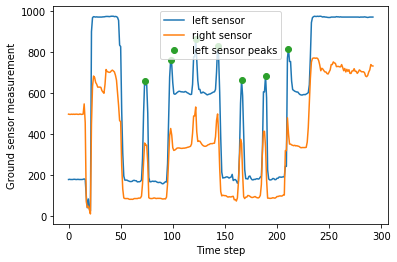

In [29]:
l_sensor = [x["ground"][0] for x in thymio_data]
r_sensor = [x["ground"][1] for x in thymio_data]
avg_ground = [(l+r)/2 for l, r in zip(l_sensor, r_sensor)]
l_peaks = find_peaks(l_sensor, 610, 10)[0]

plt.plot(l_sensor, label="left sensor")
plt.plot(r_sensor, label="right sensor")
plt.plot(l_peaks, [l_sensor[idx] for idx in l_peaks], "o", label = "left sensor peaks")
plt.xlabel("Time step")
plt.ylabel("Ground sensor measurement")
plt.legend()

<span style="color: #2980B9 ;">
<blockquote>
    Provided the constant sampling time, we can estimate how much time it took the Thymio to cross the 7 peaks, i.e. 6 stripes, with each stripe measuring 50mm. 

In [11]:
thymio_mms_speed = 6*50/Ts/(l_peaks[-1]-l_peaks[0])
print("The Thymio's speed in mm/s is {}".format(thymio_mms_speed))

The Thymio's speed in mm/s is 21.73913043478261


### Conversion factor : Thymio speed -> mm/s

<span style="color: #2980B9 ;">
<blockquote> 
    Given that the thymio was given a command of 50, this leads to a conversion factor between the thymio's speed and the real speed of : 

In [12]:
thymio_speed_to_mms = thymio_mms_speed/50
print("To go from Thymio speed to mm/s, the conversion factor is {}".format(thymio_speed_to_mms))

To go from Thymio speed to mm/s, the conversion factor is 0.43478260869565216


### Speed variance

**Hint** : make sure to only use the portion of the data where the robot is moving. You can easily identify the data of interest by plotting the robot's speed.

<span style="color: #2980B9 ;">
<blockquote>
Let's start by plotting the robot's speed

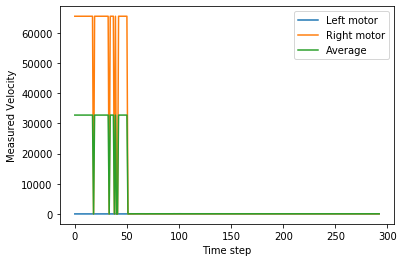

In [28]:
l_speed = [x["left_speed"] for x in thymio_data]
r_speed = [x["right_speed"] for x in thymio_data]
avg_speed = [(x["left_speed"]+x["right_speed"])/2 for x in thymio_data]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed, label="Average")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

<span style="color: #2980B9 ;">
<blockquote>
    We see that until approximately 50 the robot is not moving (speed at 0 or max value). That is why we have a look at the cropped data.

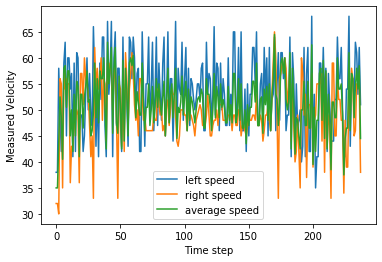

In [31]:
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed[55:], label="average speed")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

<span style="color: #2980B9 ;">
<blockquote>
Now that we have isolated the portion of the data where the Thymio is moving, we can compute the variance of the Thymio's speed in $mm^2/s^2$

In [15]:
var_speed = np.var(avg_speed[55:]/thymio_speed_to_mms)
std_speed = np.std(avg_speed[55:]/thymio_speed_to_mms)

print("The speed variance in mm^2/s^2 is {}".format(std_speed))

The speed variance in mm^2/s^2 is 12.306044894776846


### Variance of speed state and measurements

<span style="color: #2980B9 ;">
<blockquote>
    Assuming that half og the varance is caused by the measurements and half is caused by perturbations to the states, this gives us :
    
- $q_\nu = 6.15  mm^2/s^2$
- $r_\nu = 6.15  mm^2/s^2$

In [16]:
q_nu = std_speed/2 # variance on speed state
r_nu = std_speed/2 # variance on speed measurement 

## Variance on position state and measurement

<span style="color: #2980B9 ;">
<blockquote>

The standard deviation √qp is chosen somehow arbitrarily as 0.2mm, i.e. qp = 0.04mm . Finally, rp is based on the slope of the ground sensor measurement and the sampling period. With a displacement of 2.7 mm per sample, we can choose √rp = 0.5 mm, i.e. 2 rp =0.25mm .

In [17]:
qp = 0.04 # variance on position state
rp = 0.25 # variance on position measurement 

# Kalman Filter Implementation


1. In python, implement the function which estimates the states with a Kalman filter. Run it with your experimental data and analyze the results. If you need some help understanding how the filter works you can have a look at the tutorial provided [here](https://towardsdatascience.com/kalman-filters-a-step-by-step-implementation-guide-in-python-91e7e123b968)

<span style="color: #2980B9 ;">

<blockquote>
    When running the robot over the stripes, one can see the correction made for each ground transition, large at the beginning, and then only to correct the perturbations and model mismatch (approximate speed factor, robot deviating from a straight trajectory perpendicular to the stripes). Each time the robot is moved manually to put it back to the beginning of the ground pattern, the estimated position is synchronized with new ground transition measurements.


2.  What is the effect of the choice of the noise variances? How can you obtain sensible values?

<blockquote>
<span style="color: #2980B9 ;">

- Setting $Q_{11}$ to a large value: the covariance of the a priori estimate grows (in the model, the disturbance wk makes the state $x_{k+1}$ less well known), but the a posteriori estimate doesn’t grow beyond some finite upper bound. Even if the model cannot provide much information about the new state, the a posteriori estimate converges to a covariance based only on the measurement.

- Setting $Q_{22}$ to a large value: the estimation of the second state is based only on the model. If the model fails to provide an estimate (large $Q_{22}$), the a posteriori covariance grows in an unbounded way.

- Setting $R$ to 0 : a zero covariance results in a perfectly known a posteriori state estimate, even if the a priori covariance is non-zero.

- Setting $R$ to a large value: like when setting $H=0$ (reminder : $y=Hx_k+\nu_k$), the measurement doesn’t provide much information and the a posteriori estimate converges to the a priori estimate.

3. Which effect the initial state estimate and covariance have? Which covariance makes sense as initial value?

<span style="color: #2980B9 ;">
<blockquote>
In theory, the initial covariance should be large since the first state estimate is unknown and assumed to be zero. But the estimated state covariance $P$ converges quickly to a finite value independent of the initial value.



Validate your answers with more experiments

## Filter Implementation

<span style="color: #2980B9 ;">
<blockquote>
    To determine the threshold value required to ID a transition, we plotted the average ground sensor values. The threshold chosen must contain all the peaks of our signal but also avoid capturing values located in plateaus

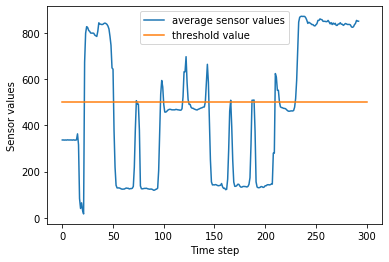

In [34]:
plt.plot(avg_ground, label="average sensor values")
plt.plot([0, 300], [500, 500], label="threshold value")
plt.xlabel("Time step")
plt.ylabel("Sensor values")
plt.legend()

<span style="color: #2980B9 ;">
<blockquote> 
    Based on the graph above we choose a threshold value of 500

In [19]:
# Initialising the remaining constants
# units: length [mm], time [s]
A = np.array([[1, Ts], [0, 1]])
stripe_width = 50
Q = np.array([[qp, 0], [0, q_nu]]);
speed_conv_factor = 0.3375;
transition_thresh = 500

def kalman_filter(speed, ground_prev, ground, pos_last_trans, x_est_prev, P_est_prev,
                  HT=None, HNT=None, Q=None, RT=None, RNT=None):
    """
    Estimates the current state using input sensor data and the previous state
    
    param speed: measured speed (Thymio units)
    param ground_prev: previous value of measured ground sensor
    param ground: measured ground sensor
    param pos_last_trans: position of the last transition detected by the ground sensor
    param x_est_prev: previous state a posteriori estimation
    param P_est_prev: previous state a posteriori covariance
    
    return pos_last_trans: updated if a transition has been detected
    return x_est: new a posteriori state estimation
    return P_est: new a posteriori state covariance
    """
    
    ## Prediciton through the a priori estimate
    # estimated mean of the state
    x_est_a_priori = np.dot(A, x_est_prev);
    
    # Estimated covariance of the state
    P_est_a_priori = np.dot(A, np.dot(P_est_prev, A.T)) + Q;
    
    ## Update         
    # y, C, and R for a posteriori estimate, depending on transition
    if ((ground_prev < transition_thresh)^(ground < transition_thresh)) : #XOR (one or the other but not both)
        if (ground>ground_prev):
            stripe_width = 44
        else:
            stripe_width = 4
        # transition detected
        pos_last_trans = pos_last_trans + stripe_width;
        y = np.array([[pos_last_trans],[speed*speed_conv_factor]])
        H = np.array([[1, 0],[0, 1]])
        R = np.array([[rp, 0],[0, r_nu]])
    else:
        # no transition, use only the speed
        y = speed*speed_conv_factor;
        H = np.array([[0, 1]])
        R = r_nu;

    # innovation / measurement residual
    i = y - np.dot(H, x_est_a_priori);
    # measurement prediction covariance
    S = np.dot(H, np.dot(P_est_a_priori, H.T)) + R;
             
    # Kalman gain (tells how much the predictions should be corrected based on the measurements)
    K = np.dot(P_est_a_priori, np.dot(H.T, np.linalg.inv(S)));
    
    
    # a posteriori estimate
    x_est = x_est_a_priori + np.dot(K,i);
    P_est = P_est_a_priori - np.dot(K,np.dot(H, P_est_a_priori));
     
    return pos_last_trans, x_est, P_est

## Full filtering pipeline

### Pipeline Implementation

In [20]:
x_est = [np.array([[0], [0]])]
P_est = [1000 * np.ones(2)]
pos_trans = [0]
k0 = 55
ground = [avg_ground[k0-1]]
speed = [avg_speed[k0-1]]

for k in tqdm(range(55, len(thymio_data))):
    speed.append(avg_speed[k])
    ground.append(avg_ground[k])
    new_pos_last_trans, new_x_est, new_P_est = kalman_filter(speed[-1], ground[-2], ground[-1], 
                                                             pos_trans[-1], x_est[-1], P_est[-1])
    x_est.append(new_x_est)
    P_est.append(new_P_est)
    pos_trans.append(new_pos_last_trans)


100%|██████████| 238/238 [00:00<00:00, 20783.77it/s]


### Visualisation

<span style="color: #2980B9 ;">
<blockquote>
Having applied the filering pipeline on the data acquired, we will now visualise the different quantities of relevance 

#### Odometry vs. Filtered Position

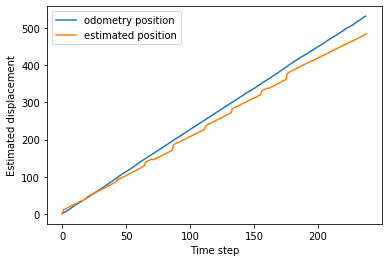

In [35]:
pos_increments = avg_speed[k0:]/(1/(thymio_speed_to_mms*Ts))
odom_pos= np.cumsum(pos_increments)
plt.plot([x for x in odom_pos], label="odometry position")
plt.plot([x[0][0] for x in x_est], label="estimated position")
plt.xlabel("Time step")
plt.ylabel("Estimated displacement")
plt.legend()

#### Transitions

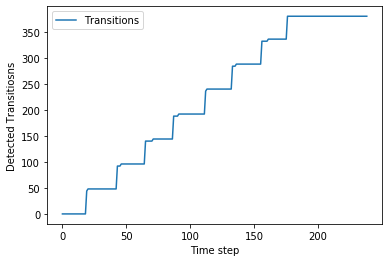

In [39]:
plt.plot(pos_trans, label="Transitions")
plt.xlabel("Time step")
plt.ylabel("Detected Transitions")
plt.legend()

#### Velocities

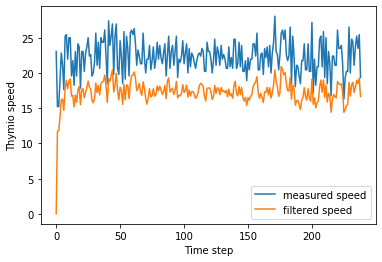

In [37]:
plt.plot(speed/(1/thymio_speed_to_mms), label="measured speed")
plt.plot([x[1][0] for x in x_est], label="filtered speed")
plt.xlabel("Time step")
plt.ylabel("Thymio speed")
plt.legend()